## Importing Data

In [1]:
import pandas as pd, numpy as np

In [2]:
Y = pd.read_csv("data/curedData.csv", usecols=["label"]).squeeze()

In [3]:
allScores = pd.read_csv("results/CVscores.csv", header=[0,1], index_col=0)

In [7]:
allScores

0                                            1            \
             RF       SVM       XGB  KNN       ADA        RF       SVM   
molID                                                                    
0      1.000000  0.913001  0.984110  1.0  0.683250  0.990000  0.873272   
1      0.880000  0.882639  0.956918  0.8  0.686233  0.940000  0.851033   
2      0.953333  0.905637  0.920718  1.0  0.506861  0.934000  0.870100   
3      0.885167  0.921873  0.863348  1.0  0.505689  1.000000  0.934375   
4      0.880000  0.882639  0.956918  0.8  0.686233  0.638500  0.814598   
...         ...       ...       ...  ...       ...       ...       ...   
728    0.740000  0.806337  0.726651  1.0  0.334158  0.955833  0.907824   
729    0.955500  0.872161  0.709525  1.0  0.505689  0.962667  0.886546   
730    0.790000  0.651471  0.583854  0.8  0.495690  0.740000  0.756112   
731    0.850000  0.594977  0.582662  0.8  0.494958  0.830000  0.700873   
732    0.975000  0.830241  0.936026  1.0  0.505689  0.950000  0.851840   

                                ...        98                           \
            XGB  KNN       ADA  ...        RF       SVM       XGB  KNN   
molID                           ...                                      
0      0.970967  1.0  0.509787  ...  0.970000  0.893405  0.989133  1.0   
1      0.914484  0.8  0.510366  ...  0.970000  0.875325  0.961896  1.0   
2      0.907119  1.0  0.508516  ...  0.710131  0.876722  0.749686  1.0   
3      0.903332  1.0  0.510366  ...  0.710131  0.876722  0.749686  1.0   
4      0.671398  0.8  0.509787  ...  0.476000  0.741197  0.509934  0.6   
...         ...  ...       ...  ...       ...       ...       ...  ...   
728    0.844317  1.0  0.508516  ...  0.846667  0.848848  0.859243  1.0   
729    0.887558  1.0  0.510366  ...  0.965000  0.847047  0.763740  1.0   
730    0.528711  1.0  0.500933  ...  0.730000  0.693927  0.527111  0.8   
731    0.459344  1.0  0.498924  ...  0.710000  0.727005  0.395800  1.0   
732    0.834447  1.0  0.508516  ...  0.973500  0.829731  0.971446  1.0   

                       99                                     
            ADA        RF       SVM       XGB  KNN       ADA  
molID                                                         
0      0.511877  0.970000  0.870663  0.977973  1.0  0.510710  
1      0.511942  0.910000  0.846920  0.900389  0.8  0.507002  
2      0.507953  0.902000  0.903164  0.873705  1.0  0.501225  
3      0.507953  0.936667  0.894157  0.897169  1.0  0.508403  
4      0.507617  0.564000  0.822462  0.538325  0.6  0.505161  
...         ...       ...       ...       ...  ...       ...  
728    0.507617  0.790000  0.860346  0.965778  1.0  0.513781  
729    0.507953  0.930000  0.906221  0.833440  1.0  0.507207  
730    0.496909  0.740000  0.733781  0.686332  0.8  0.508403  
731    0.496909  0.872500  0.794929  0.628156  1.0  0.498581  
732    0.511942  0.960000  0.839811  0.898582  0.8  0.507207  

[733 rows x 500 columns]

In [4]:
consensusScores =pd.concat( 
            [allScores[cv].mean(axis=1) for cv in allScores.columns.levels[0] ], 
            axis=1, names = range(100))

In [5]:
predsConsensus = pd.read_csv("results/predsConsensusCV_05.csv", index_col=0)

In [9]:
predsConsensus

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
molID,,,,,,,,,,,,,,,,,,,,,
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,1,1,0,0,1,0,1,0,1,0,...,1,1,1,1,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
728,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
729,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
730,1,1,1,0,1,1,0,1,1,1,...,0,0,1,1,0,0,1,1,1,1


## Normalization in range [-1, +1] 

In [6]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
normalizer=MinMaxScaler(feature_range=(-1,1))

In [8]:
tmp=allScores.values.flatten()

# Concatenating 0 and 1 dummy values to assess presence of min and max values respectively
tmp=np.insert(tmp, 0, 0)
tmp=np.insert(tmp, 0, 1)

# normalizing
tmp=normalizer.fit_transform(tmp.reshape(-1,1))

# removing dummy values to restore original dimension of normalized data
tmp=tmp[2:]

allNormScores=pd.DataFrame(tmp.reshape((733,500)), columns=allScores.columns)
del tmp

In [16]:
allNormScores

0                                            1            \
           RF       SVM       XGB  KNN       ADA        RF       SVM   
0    1.000000  0.826002  0.968219  1.0  0.366500  0.980000  0.746545   
1    0.760000  0.765277  0.913837  0.6  0.372465  0.880000  0.702066   
2    0.906667  0.811275  0.841437  1.0  0.013721  0.868000  0.740199   
3    0.770333  0.843747  0.726697  1.0  0.011377  1.000000  0.868751   
4    0.760000  0.765277  0.913837  0.6  0.372465  0.277000  0.629197   
..        ...       ...       ...  ...       ...       ...       ...   
728  0.480000  0.612673  0.453302  1.0 -0.331684  0.911667  0.815649   
729  0.911000  0.744322  0.419051  1.0  0.011377  0.925333  0.773093   
730  0.580000  0.302943  0.167707  0.6 -0.008620  0.480000  0.512225   
731  0.700000  0.189954  0.165325  0.6 -0.010084  0.660000  0.401745   
732  0.950000  0.660482  0.872052  1.0  0.011377  0.900000  0.703680   

                              ...        98                           \
          XGB  KNN       ADA  ...        RF       SVM       XGB  KNN   
0    0.941934  1.0  0.019574  ...  0.940000  0.786811  0.978266  1.0   
1    0.828968  0.6  0.020732  ...  0.940000  0.750651  0.923793  1.0   
2    0.814238  1.0  0.017031  ...  0.420262  0.753444  0.499372  1.0   
3    0.806664  1.0  0.020732  ...  0.420262  0.753444  0.499372  1.0   
4    0.342795  0.6  0.019574  ... -0.048000  0.482394  0.019868  0.2   
..        ...  ...       ...  ...       ...       ...       ...  ...   
728  0.688633  1.0  0.017031  ...  0.693333  0.697697  0.718487  1.0   
729  0.775117  1.0  0.020732  ...  0.930000  0.694095  0.527480  1.0   
730  0.057422  1.0  0.001867  ...  0.460000  0.387854  0.054223  0.6   
731 -0.081311  1.0 -0.002151  ...  0.420000  0.454010 -0.208400  1.0   
732  0.668894  1.0  0.017031  ...  0.947000  0.659463  0.942893  1.0   

                     99                                     
          ADA        RF       SVM       XGB  KNN       ADA  
0    0.023753  0.940000  0.741326  0.955945  1.0  0.021419  
1    0.023884  0.820000  0.693841  0.800778  0.6  0.014004  
2    0.015906  0.804000  0.806327  0.747410  1.0  0.002449  
3    0.015906  0.873333  0.788313  0.794339  1.0  0.016806  
4    0.015234  0.128000  0.644924  0.076649  0.2  0.010321  
..        ...       ...       ...       ...  ...       ...  
728  0.015234  0.580000  0.720693  0.931555  1.0  0.027563  
729  0.015906  0.860000  0.812443  0.666881  1.0  0.014413  
730 -0.006182  0.480000  0.467562  0.372664  0.6  0.016806  
731 -0.006182  0.745000  0.589858  0.256313  1.0 -0.002837  
732  0.023884  0.920000  0.679622  0.797164  0.6  0.014413  

[733 rows x 500 columns]

## Computing std values

In [9]:
dSTD=allNormScores.std(axis=1)
dSTD.sort_values(inplace=True)

In [19]:
dSTD

626    0.141565
704    0.146785
358    0.159261
278    0.167992
658    0.173209
         ...   
269    0.482987
153    0.494437
369    0.504805
437    0.523190
418    0.572931
Length: 733, dtype: float64

In [10]:
predsSort=predsConsensus.iloc[dSTD.index]

In [11]:
scoresSort = consensusScores.iloc[dSTD.index]

In [21]:
predsSort

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
molID,,,,,,,,,,,,,,,,,,,,,
626,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
704,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
358,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
278,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
658,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
153,0,1,1,1,1,1,0,1,1,0,...,1,1,1,0,0,1,1,1,0,1
369,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# repating true labels for 100cv .. just for metric computing comfortness
Yaugm=pd.concat([Y for _ in range(100)], axis=1, ignore_index=True)
# sorting true label based on std values (from low to high values)
Yaugm=Yaugm.iloc[dSTD.index]

In [24]:
Yaugm

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
728,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
729,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
730,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
731,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


## Computing metrics

In [13]:
from utilsMetric import metricsAll

In [22]:
results=pd.DataFrame(columns=metricsAll.keys(), index=range(1,101) #Compounds percentage
                    )
for c in range(1,101):
    end=int(np.round(733*c/100))
    # predictions until % end compounds
    tmpPreds=predsSort.iloc[:end].values.flatten()
    tmpScores = scoresSort.iloc[:end].values.flatten()
    tmpY=Yaugm.iloc[:end].values.flatten()

    # computing all metrics for this step percentage
    for metrName, metrFun in metricsAll.items():
        results.at[c,metrName] = metrFun(tmpY, tmpPreds, tmpScores)
        
## output errors can appear cause of some divisions by 0 are concerned

/home/toxi/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/toxi/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/toxi/.local/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1020: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(
/home/toxi/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter

In [35]:
results.loc[59]

tp             36671
tn              1605
fp              4595
fn               329
spec        0.258871
sens        0.991108
balacc       0.62499
mcc         0.423815
ppv         0.888649
npv         0.829886
PRcurve     0.916638
ROCcurve    0.708342
Name: 59, dtype: object

In [16]:
from matplotlib import pyplot as plt

In [23]:
perc=59

# 0.57 is median value of MCC achieved from our new ad method in CV
ourmcc=.57

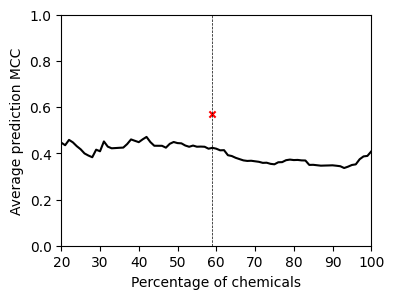

In [32]:
plt.figure(figsize=(4,3))
plt.plot(results.index,results["mcc"],c="black")
plt.ylabel("Average prediction MCC")
plt.xlabel("Percentage of chemicals")
plt.xticks([1]+list(range(10,101,10)) )
plt.xlim(20,100)
plt.ylim(0,1.0)

plt.vlines(perc,0,1, colors="black", lw=0.5,linestyles="dashed")

plt.scatter(perc,ourmcc, c="red", s=20, marker="x",)
plt.gcf().savefig("results/benchmarkingAD.svg", bbox_inches='tight')
plt.show()

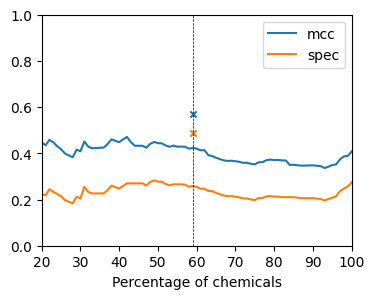

In [33]:
plt.figure(figsize=(4,3))
plt.plot(range(1,101),results["mcc"], label = "mcc")
plt.plot(range(1,101),results["spec"], label="spec")
# plt.ylabel("Average prediction MCC")
plt.xlabel("Percentage of chemicals")
plt.xticks([1]+list(range(10,101,10)) )
plt.xlim(20,100)
plt.ylim(0,1.0)

plt.vlines(perc,0,1, colors="black", lw=0.5,linestyles="dashed")

plt.scatter(perc,ourmcc, s=20, marker="x",)
plt.scatter(perc,.49, s=20, marker="x",)
# plt.gcf().savefig("PaperFigures/ADbenchmark.svg", bbox_inches='tight')
plt.legend()
plt.show()

## Shared molecules beetween 2 methods

In [25]:
reliabilityPreds=pd.read_csv("results/realiabilityPredsConsensus_05.csv", index_col=0)

In [26]:
reliabilityPreds

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
molID,,,,,,,,,,,,,,,,,,,,,
0,True,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,True,False,True,True,True,False,True,True,False,...,True,True,True,True,False,False,True,True,True,True
2,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,True,True,False,False,True,False,False,...,False,False,False,True,False,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
728,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
729,True,True,True,True,False,False,False,False,True,False,...,True,True,True,False,False,False,True,False,True,True
730,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [27]:
## Sorting chemicals based on reliable predictions count for each chemical, from highest to lowest.
# 432 is median value of reliabile predictions in CV (59% of total chemicals/predictions)
molsInsideAD = reliabilityPreds.sum(axis=1).sort_values(ascending=False).iloc[:432].index

In [30]:
molsBench=predsSort.iloc[:432].index

In [31]:
np.intersect1d(molsBench, molsInsideAD).size

265